## MultiHeadAttentionのtransposeの秘密

In [9]:
import numpy as np
import torch
import torch.nn as nn

In [10]:
a = np.arange(36).reshape(1,3,12)
a = a.repeat(3,axis=0).reshape(3,3,12)
a = torch.tensor(a)
a

tensor([[[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
         [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
         [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]],

        [[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
         [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
         [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]],

        [[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
         [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
         [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]]])

In [11]:
a.reshape(3, 3, 3, 4).transpose(1,2)

tensor([[[[ 0,  1,  2,  3],
          [12, 13, 14, 15],
          [24, 25, 26, 27]],

         [[ 4,  5,  6,  7],
          [16, 17, 18, 19],
          [28, 29, 30, 31]],

         [[ 8,  9, 10, 11],
          [20, 21, 22, 23],
          [32, 33, 34, 35]]],


        [[[ 0,  1,  2,  3],
          [12, 13, 14, 15],
          [24, 25, 26, 27]],

         [[ 4,  5,  6,  7],
          [16, 17, 18, 19],
          [28, 29, 30, 31]],

         [[ 8,  9, 10, 11],
          [20, 21, 22, 23],
          [32, 33, 34, 35]]],


        [[[ 0,  1,  2,  3],
          [12, 13, 14, 15],
          [24, 25, 26, 27]],

         [[ 4,  5,  6,  7],
          [16, 17, 18, 19],
          [28, 29, 30, 31]],

         [[ 8,  9, 10, 11],
          [20, 21, 22, 23],
          [32, 33, 34, 35]]]])

In [12]:
print(a.reshape(3, 3, 3, 4))

tensor([[[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],

         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]],

         [[24, 25, 26, 27],
          [28, 29, 30, 31],
          [32, 33, 34, 35]]],


        [[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],

         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]],

         [[24, 25, 26, 27],
          [28, 29, 30, 31],
          [32, 33, 34, 35]]],


        [[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],

         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]],

         [[24, 25, 26, 27],
          [28, 29, 30, 31],
          [32, 33, 34, 35]]]])


transposeしないと、それぞれの単語ベクトルが一つのクエリになってるように変形されてしまう。

In [13]:
torch.arange(10).unsqueeze(1)

tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7],
        [8],
        [9]])

## positional encoding

In [22]:
class PositionalEncoding(nn.Module):
    """
    位置エンコーディング
    
    args:
      - d_model (int) : ベクトルの次元数
      - dropout (float)
      - device
      - max_len (int) : 許容しうる最大の長さの文章
    """
    def __init__(self, d_model, dropout, device="cpu", max_len = 10000):
        super().__init__()
        self.pe = torch.zeros(max_len, d_model)
        pos = torch.arange(0,max_len).unsqueeze(1).type(torch.float32)
        tmp = torch.arange(0,d_model,2)
        den = 1/torch.pow(torch.ones(int(d_model/2))*10000,2*tmp/d_model)
        den = den.unsqueeze(0)
        self.pe[:,0::2] = torch.sin(torch.matmul(pos,den))
        self.pe[:,1::2] = torch.cos(torch.matmul(pos,den))
        self.pe = self.pe.to(device)

    def forward(self, x):
        return x + self.pe[:x.shape[1],:]

pe = PositionalEncoding(512,0.0, max_len=50)

data = torch.tensor(np.random.rand(3,10,512))
print(pe(data).shape)


torch.Size([3, 10, 512])


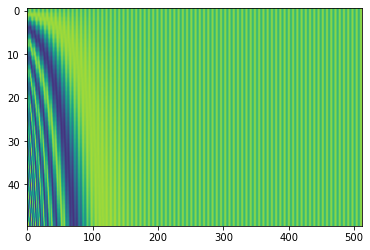

In [23]:
data = pe.pe.numpy()
import matplotlib.pyplot as plt

fig, ax= plt.subplots()
ax.imshow(data, aspect="auto")

## Positional Encoding

In [3]:
class PositionalEncoding(nn.Module):
    """
    位置エンコーディング
    
    args:
      - d_model (int) : ベクトルの次元数
      - dropout (float)
      - device
      - max_len (int) : 許容しうる最大の長さの文章
    """
    def __init__(self, d_model, dropout, device="cpu", max_len = 10000):
        super().__init__()
        self.pe = torch.zeros(max_len, d_model)
        pos = torch.arange(0,max_len).unsqueeze(1).type(torch.float32)
        tmp = torch.arange(0,d_model,2)
        den = 1/torch.pow(torch.ones(int(d_model/2))*10000,2*tmp/d_model)
        den = den.unsqueeze(0)
        self.pe[:,0::2] = torch.sin(torch.matmul(pos,den))
        self.pe[:,1::2] = torch.cos(torch.matmul(pos,den))
        self.pe = self.pe.to(device)

    def forward(self, x):
        return x + self.pe[:x.shape[1],:]

In [5]:
PE = PositionalEncoding(512, 0.0)
d_model = 512
data = torch.tensor(np.random.rand(3,10,d_model).astype(np.float32))
PE(data).shape

torch.Size([3, 10, 512])

In [6]:
np.random.randint(0,2, size=(10,10))

array([[1, 1, 0, 1, 1, 1, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1, 1, 1, 0, 1],
       [0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 1, 0, 1],
       [1, 0, 1, 1, 0, 1, 0, 1, 1, 1],
       [0, 1, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 1, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 1, 1],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 0, 0, 0, 0]])

In [14]:
from torch.autograd import Variable
import copy

vocab_size = 50

def generate_data(batch_size, word_len):
    """
    generate data of virtual sentence
    output:
        - src (torch.tensor) (batch_size, word_len) : virtual sentence 
        - tgt (torch.tensor) (batch_size, word_len) : same of src
    """
    data = torch.LongTensor(np.random.randint(1, vocab_size, size=(batch_size, word_len)))
    data[:,0] = 0
    src = copy.deepcopy(data)
    tgt = copy.deepcopy(data)
    return src, tgt

def subsequent_mask(size):
    "Mask out subsequent positions."
    attn_shape = (1, size, size)
    subsequent_mask = np.triu(np.ones(attn_shape), k=1).astype('uint8')
    return torch.from_numpy(subsequent_mask) == 0

def make_std_mask(tgt, pad):
    "Create a mask to hide padding and future words."
    tgt_mask = (tgt != pad).unsqueeze(-2)
    tgt_mask = tgt_mask & Variable(
        subsequent_mask(tgt.size(-1)).type_as(tgt_mask.data))
    return tgt_mask


data = generate_data(3,10)[0]

In [15]:
make_std_mask(data, pad = 0)

tensor([[[False, False, False, False, False, False, False, False, False, False],
         [False,  True, False, False, False, False, False, False, False, False],
         [False,  True,  True, False, False, False, False, False, False, False],
         [False,  True,  True,  True, False, False, False, False, False, False],
         [False,  True,  True,  True,  True, False, False, False, False, False],
         [False,  True,  True,  True,  True,  True, False, False, False, False],
         [False,  True,  True,  True,  True,  True,  True, False, False, False],
         [False,  True,  True,  True,  True,  True,  True,  True, False, False],
         [False,  True,  True,  True,  True,  True,  True,  True,  True, False],
         [False,  True,  True,  True,  True,  True,  True,  True,  True,  True]],

        [[False, False, False, False, False, False, False, False, False, False],
         [False,  True, False, False, False, False, False, False, False, False],
         [False,  True,  T

In [18]:
word_len = 10
mask = np.tril(np.ones((word_len,word_len))).astype(np.float32)
mask

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)